In [1]:
import numpy as np
import pandas as pd

In [2]:
df_sur=pd.read_csv('https://cocl.us/datascience_survey_data')
df_sur

,Unnamed: 0,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136
5,Machine Learning,1629,477,74


In [3]:
#Let's put the unnamed column as index, and then remove the index name
df_sur.set_index('Unnamed: 0', inplace=True)

In [4]:
df_sur.index.name=None
df_sur

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [5]:
df_sur.sort_values(by='Very interested', ascending=False, inplace=True)
df_sur

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [6]:
df_sur=df_sur/2233
df_sur

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,0.755934,0.198836,0.026870
Machine Learning,0.729512,0.213614,0.033139
Data Visualization,0.600090,0.328706,0.045678
Big Data (Spark / Hadoop),0.596507,0.326467,0.056874
Deep Learning,0.565607,0.344828,0.060905
Data Journalism,0.192118,0.484102,0.273175


In [7]:
df_sur=df_sur*100
df_sur=df_sur.round(2)
df_sur

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


In [9]:
import matplotlib
import matplotlib.pyplot as plt

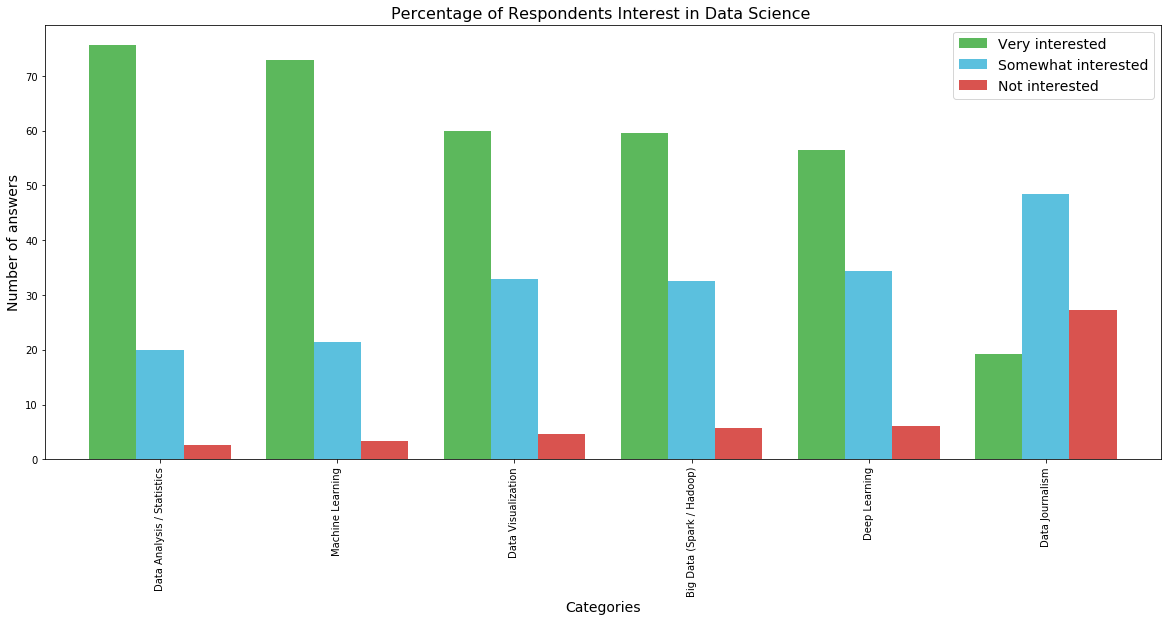

In [26]:
df_sur.plot(kind='bar', figsize=(20, 8),color=['#5cb85c', '#5bc0de', '#d9534f'],width= 0.8)

plt.xlabel('Categories', fontsize=14)
plt.ylabel('Number of answers', fontsize=14) 
plt.title('Percentage of Respondents Interest in Data Science ', fontsize=16) 
plt.legend(fontsize=14)
        
plt.show()

In [32]:
#using this method, it is quite hard to add the percentage on top of each bar chart, let's try another approach
#Let's also create a color list we can refer to

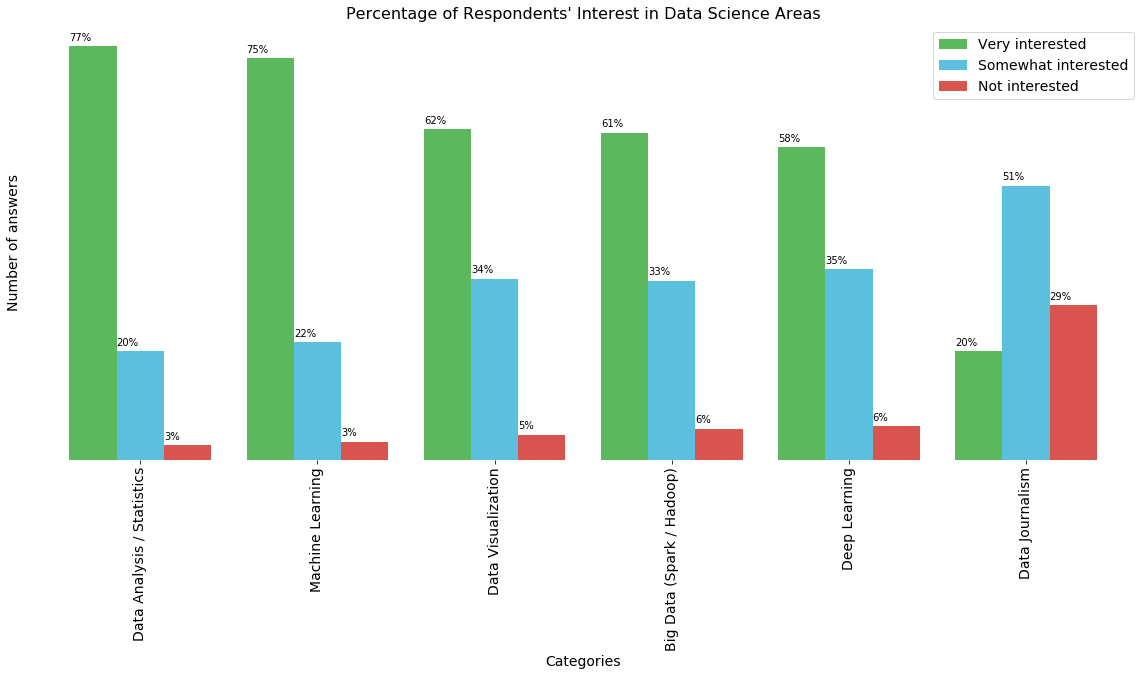

In [36]:
colors_list = ['#5cb85c','#5bc0de','#d9534f']

# Change this line to plot percentages instead of absolute values
ax = (df_sur.div(df_sur.sum(1), axis=0)).plot(kind='bar',figsize=(20,8),width = 0.8,color = colors_list,edgecolor=None)


plt.xlabel('Categories', fontsize=14)
plt.ylabel('Number of answers', fontsize=14) 
plt.legend(labels=df_sur.columns,fontsize= 14)
plt.title("Percentage of Respondents' Interest in Data Science Areas",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))